<a href="https://colab.research.google.com/github/wesleyz/atos-agrupamento/blob/main/unifica_atos_v03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Script - Agrupamento - Atos Ifes

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import cosine_similarity
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

os.system("git clone https://github.com/wesleyz/atos-agrupamento")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0

In [2]:
colunas_ = ['Campus',
           'TIPOLOGIA DO DOCUMENTO',
           'Nº',
           'ANO',
           'DATA',
           'RESUMO',
           'LINK',
           'EIXO TEMÁTICO',
           'SITUAÇÃO',
           'AUTORIDADE / COLEGIADO EMISSOR',
           'OBSERVAÇÃO']

atos = pd.read_csv("./atos-agrupamento/compilado-atos_.csv", sep=';')
atos.columns=colunas_

documents = atos['RESUMO'].values.astype('U')

In [3]:
#data = [dict(name='Google', url='http://www.google.com'),
#        dict(name='Stackoverflow', url='http://stackoverflow.com')]
#df = pd.DataFrame(data)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, 'Link')

In [4]:
#documents = corpus.data 




def vetoriza_texto(texto, ngram=(1,1),feats=100):
    vectorizer =  TfidfVectorizer(ngram_range=ngram,
                                  lowercase=True,
                                  max_features=feats) # TfidfVectorizer(stop_words='english')
    return vectorizer.fit_transform(texto)


def clusteriza(X, title='Cluster', dimensao=(5,50)):
    #plt.plot(figsize=(10,18.16))
    model = KElbowVisualizer(KMeans(), k=dimensao, timings=False, locate_elbow=True)
    model.fit(X.toarray())    
        
    plt.legend()
    plt.title(title)  
    plt.show()
    #return [model.elbow_score_,model.elbow_value_]
    
'''
resultados_score_cluster =[]
p_ngram = [(1,1),(1,2),(1,3) ,(1,4),(1,5)]
n_palavras = [10,100,1000,10000]
dim = (2,10)
rodadas = 1

plt.legend()           
for pn in p_ngram:
  for n_word in n_palavras:
      print("_".join([str(pn[1]), str(n_word)]))
      label = "_".join([str(pn[1]), str(n_word)])
      valores = clusteriza(vetoriza_texto(documents, ngram=pn, feats=n_word),label, dimensao=dim)
      
      plt.legend(label)
      resultados_score_cluster.append(valores)
                  
                  
                  
'''                  

           
        
           


'\nresultados_score_cluster =[]\np_ngram = [(1,1),(1,2),(1,3) ,(1,4),(1,5)]\nn_palavras = [10,100,1000,10000]\ndim = (2,10)\nrodadas = 1\n\nplt.legend()           \nfor pn in p_ngram:\n  for n_word in n_palavras:\n      print("_".join([str(pn[1]), str(n_word)]))\n      label = "_".join([str(pn[1]), str(n_word)])\n      valores = clusteriza(vetoriza_texto(documents, ngram=pn, feats=n_word),label, dimensao=dim)\n      \n      plt.legend(label)\n      resultados_score_cluster.append(valores)\n                  \n                  \n                  \n'

# Processamento do Agrupamento - Modo 1

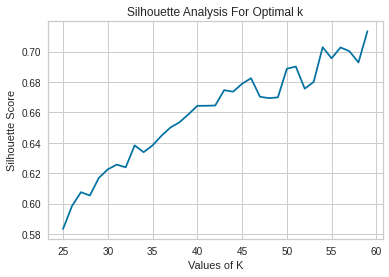

In [5]:
#@title Hyper Params Clusterization
#@markdown Forms support many types of fields.
min_n_clusters = 25 #@param {type:"slider", min:2, max:40, step:1}
max_n_clusters = 60 #@param {type:"slider", min:26, max:70, step:1}
n_grams = 10 #@param {type:"slider", min:1, max:80, step:1}
n_features = 101 #@param {type:"slider", min:1, max:1001, step:100}
#@markdown ---

pn = (2,int(n_grams))
n_word = n_features
X = vetoriza_texto(documents, ngram=pn, feats=n_word)
range_n_clusters = list(range(min_n_clusters,max_n_clusters))
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Processamento do Agrupamento - Modo 2

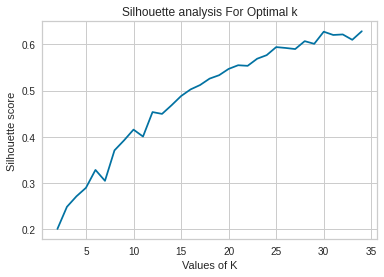

In [6]:
#@title Hyper Params Clusterization
#@markdown Forms support many types of fields.
input_n_clusters = 35 #@param {type:"slider", min:2, max:50, step:1}
n_grams = 10 #@param {type:"slider", min:1, max:10, step:1}
n_features = 101 #@param {type:"slider", min:1, max:1001, step:100}
#@markdown ---
pn = (2,int(n_grams))
n_word = n_features
X = vetoriza_texto(documents, ngram=pn, feats=n_word)
range_n_clusters = list(range(2,int(input_n_clusters)))
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_ 
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Vetorização do Texto

In [7]:
#@title Hyper Params Vectorization
#@markdown Forms support many types of fields.



n_grams = 10 #@param {type:"slider", min:2, max:10, step:1}
n_features = 101 #@param {type:"slider", min:1, max:1001, step:100}
n_rank = 20 #@param {type:"slider", min:5, max:50, step:5}

#@markdown ---


pn = (2,int(n_grams))
n_word = n_features

vectorizer =  TfidfVectorizer(ngram_range=pn,
                                  lowercase=True,
                                  max_features=n_features) # TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)



df_vocabulario = pd.DataFrame(vectorizer.vocabulary_, index=[0]).T.reset_index()
df_vocabulario.columns=['termo', 'frequencia']
df_vocabulario = df_vocabulario.sort_values(by='frequencia', ascending=False)



# Top Features

In [8]:
df_vocabulario.head(n_rank)

,termo,frequencia
72,técnico em,100
38,tecnologia do espírito santo,99
32,tecnologia do espírito,98
26,tecnologia do,97
59,santa teresa,96
65,resolução cs nº,95
62,resolução cs,94
21,regimento interno do,93
18,regimento interno,92
17,pós graduação,91


# Tail Features

In [9]:
df_vocabulario.tail(n_rank)

,termo,frequencia
88,concomitante ao,19
43,ciência tecnologia do espírito santo,18
37,ciência tecnologia do espírito,17
31,ciência tecnologia do,16
25,ciência tecnologia,15
57,campus vitória,14
60,campus santa teresa,13
58,campus santa,12
82,autorizar oferta do curso técnico em,11
80,autorizar oferta do curso técnico,10


# Agrupamento

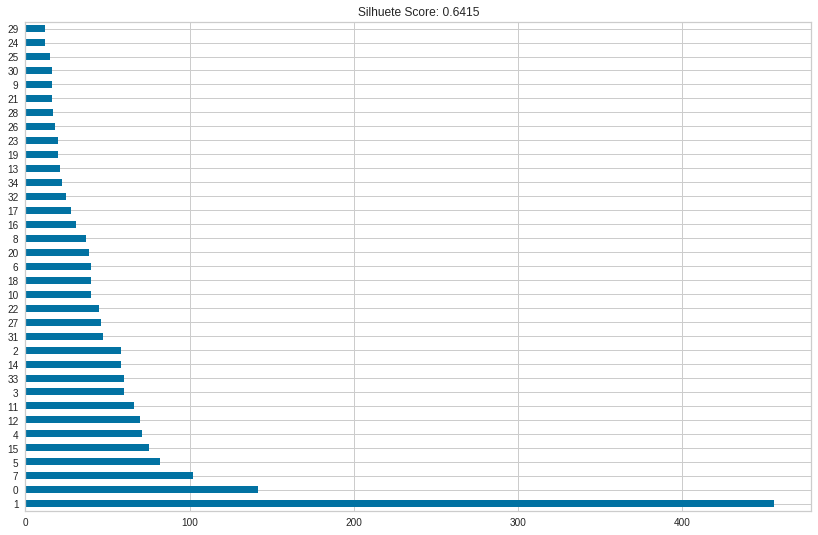

In [10]:
#@markdown ---

k_grupos = 35 #@param {type:"slider", min:5, max:50, step:1}

#@markdown ---


kmeans = KMeans(n_clusters=k_grupos)
kmeans.fit(X)
cluster_labels = kmeans.labels_
atos['cluster'] = cluster_labels
import seaborn as sea

sc = round(silhouette_score(X, cluster_labels),4)
atos['cluster'].value_counts().plot(kind='barh', title="Silhuete Score: "+str(sc), figsize=(14.08,9))
plt.show()





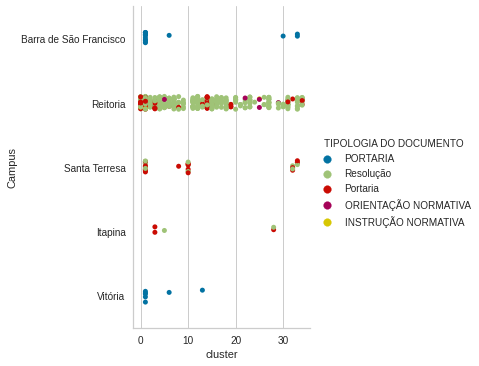

In [11]:
sea.catplot(data=atos.sample(500), hue='TIPOLOGIA DO DOCUMENTO', x='cluster', y='Campus')


In [12]:
atos['Campus_cat'] = atos.Campus.astype('category')
atos['Campus_cat'] = atos['Campus_cat'].cat.codes

In [13]:
atos['tip_cat'] = atos['TIPOLOGIA DO DOCUMENTO'].astype('category')
atos['tip_cat'] = atos['tip_cat'].cat.codes


In [14]:
atos['sit_cat'] = atos['SITUAÇÃO'].astype('category')
atos['sit_cat'] = atos['sit_cat'].cat.codes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


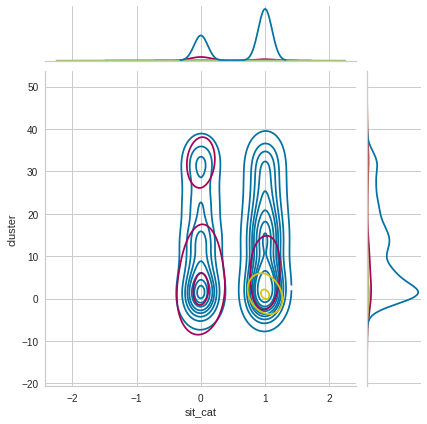

In [15]:
sea.jointplot(data=atos, x='sit_cat', hue='Campus', y='cluster', kind='kde', legend=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


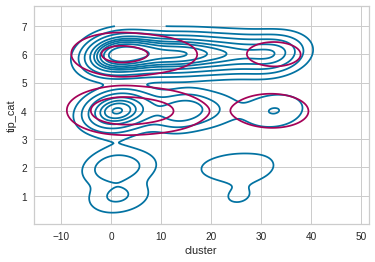

In [16]:
sea.kdeplot(data=atos, x='cluster', hue='Campus', y='tip_cat', legend=False)

In [17]:
#@markdown ---
ordernar = "cluster" #@param ["cluster", "Campus", "ANO", "RESUMO"]
#@markdown ---

atos = atos.sort_values(by=ordernar)


atos[['Campus','TIPOLOGIA DO DOCUMENTO','ANO','RESUMO',  'cluster','LINK']].style.format({'LINK': make_clickable})

,Campus,TIPOLOGIA DO DOCUMENTO,ANO,RESUMO,cluster,LINK
1389,Reitoria,Portaria,2012,Homologa Regulamento da Câmara de Ensino Técnico do IFES,0,Link
880,Reitoria,Resolução,2017,"Estabelecer, de 8 a 31 de janeiro 2018, a redução da jornada de trabalho dos servidores da Reitoria do Ifes, a ser cumprida das 8 às 14 horas",0,Link
1647,Reitoria,Portaria,2020,Aprova Plano de Transformação Digital do IFES,0,Link
887,Reitoria,Resolução,2018,"Estabelecer, horário especial de funcionamento na Reitoria do Ifes, das 7 às 13 horas, no período de 7 de janeiro de 2019 a 1 de fevereiro de 2019",0,Link
890,Reitoria,Resolução,2019,Normatiza a permissão de uso e a administração dos imóveis residenciais pertencentes ao patrimônio do Ifes.,0,Link
893,Reitoria,Resolução,2019,Aprovar o Manual de Licitação e Compras do Ifes.,0,Link
903,Reitoria,Resolução,2019,"Estabelecer, horário especial de funcionamento na Reitoria do Ifes, das 7 às 13 horas, no período de 6 a 31 de janeiro de 2020",0,Link
907,Reitoria,Resolução,2020,Delega ao Colégio de Dirigentes a apreciação e a recomendação dos regimentos internos e regulamentos das unidades organizacionais do Ifes.,0,Link
1628,Reitoria,Resolução,2016,Aprova a Política de Comunicação do Ifes.,0,Link
1627,Reitoria,Resolução,2015,Aprova o Plano de Desenvolvimento Institucional (PDI) do Ifes,0,Link


In [18]:
atos.to_csv("cluster.csv", sep=';')